In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
TRAIN_DIR = '../input/pizza-vs-ice-cream/dataset/train'
VAL_DIR = '../input/pizza-vs-ice-cream/dataset/valid'
TEST_DIR = '../input/pizza-vs-ice-cream/dataset/test'

In [3]:
IMG_SIZE=244

In [4]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
# load and iterate training dataset
train_it = traingen.flow_from_directory(TRAIN_DIR, class_mode='binary', target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)
# load and iterate validation dataset
val_it = valgen.flow_from_directory(VAL_DIR, class_mode='binary', target_size=(IMG_SIZE, IMG_SIZE),batch_size=64)
# load and iterate test dataset
test_it = testgen.flow_from_directory(TEST_DIR, class_mode='binary',target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [5]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
model = define_model()
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=50, verbose=1)

2022-11-16 10:39:06.621110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:39:06.736101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:39:06.737148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:39:06.738632: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2022-11-16 10:39:12.477051: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 16s 696ms/step - loss: 0.6897 - accuracy: 0.5515 - val_loss: 0.6770 - val_accuracy: 0.7163
Epoch 2/50
12/12 [==============================] - 6s 497ms/step - loss: 0.6571 - accuracy: 0.5975 - val_loss: 0.6600 - val_accuracy: 0.6298
Epoch 3/50
12/12 [==============================] - 6s 513ms/step - loss: 0.6324 - accuracy: 0.6476 - val_loss: 0.6465 - val_accuracy: 0.6058
Epoch 4/50
12/12 [==============================] - 6s 488ms/step - loss: 0.6169 - accuracy: 0.6825 - val_loss: 0.6103 - val_accuracy: 0.7067
Epoch 5/50
12/12 [==============================] - 6s 511ms/step - loss: 0.5732 - accuracy: 0.6922 - val_loss: 0.6049 - val_accuracy: 0.6779
Epoch 6/50
12/12 [==============================] - 7s 592ms/step - loss: 0.5396 - accuracy: 0.7646 - val_loss: 0.5450 - val_accuracy: 0.7644
Epoch 7/50
12/12 [==============================] - 7s 623ms/step - loss: 0.4936 - accuracy: 0.7702 - val_loss: 0.5223 - val_accuracy: 0.7788
Epoch 8/50
12/12

In [10]:
loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
acc

0.9056603908538818

In [22]:
import matplotlib.pyplot as plt
import sys
# plot diagnostic learning curves
def show_training_curves(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

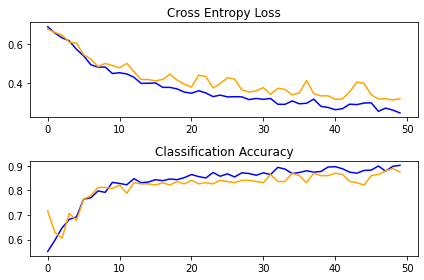

In [23]:
show_training_curves(history)

In [47]:
#Make predictions
y_probs = model.predict(test_it)

#Convert prediction probabilities into integers
# y_preds = y_probs.argmax(axis=1) multi-class

y_predict = np.where(y_probs > 0.5, 1, 0)
p = test_it.classes
q = y_predict
p = np.array(p)
q = q.flatten()

[[38 21]
 [25 22]]


[Text(0, 0.5, 'cats'), Text(0, 1.5, 'dogs')]

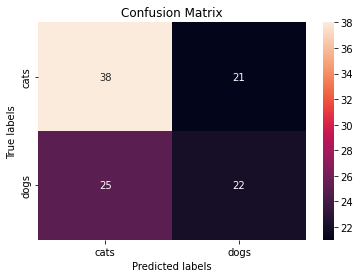

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(p, q)
print(cfm)
ax= plt.subplot()
sns.heatmap(cfm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['cats', 'dogs'])
ax.yaxis.set_ticklabels(['cats', 'dogs'])